In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
gb = pd.read_csv('GBvideos.csv')

In [3]:
gb.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


In [5]:
gb.drop(['video_id','publish_time','video_error_or_removed','ratings_disabled','comments_disabled','tags'], axis=1 ,inplace = True)

In [6]:
gb.head()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
0,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,Click here to continue the story and make your...
1,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,Musical guest Taylor Swift performs …Ready for...
2,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Eminem's new track Walk on Water ft. Beyoncé i...
3,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,Salford drew 4-4 against the Class of 92 and F...
4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...


In [7]:
gb.tail()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
38911,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,Eleni Foureira represented Cyprus at the first...
38915,18.14.06,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,10,607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,Debut album 'Light of Mine' out now: http://ky...


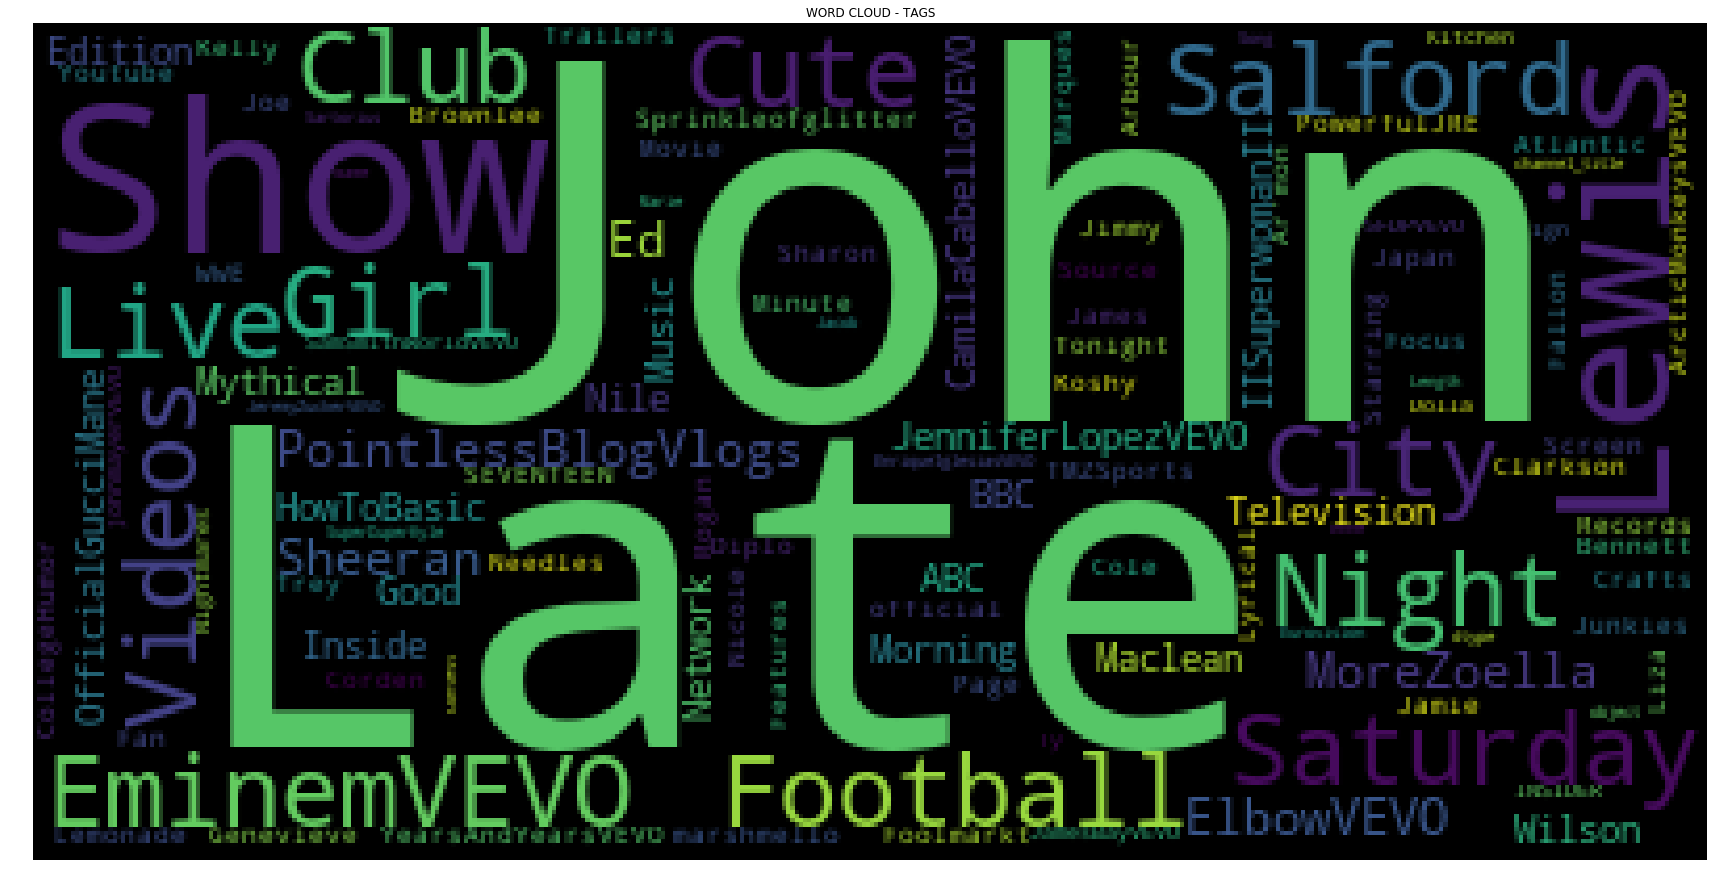

In [8]:
df_youtube = pd.DataFrame(gb)
plt.figure(figsize = (30,30))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['channel_title']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


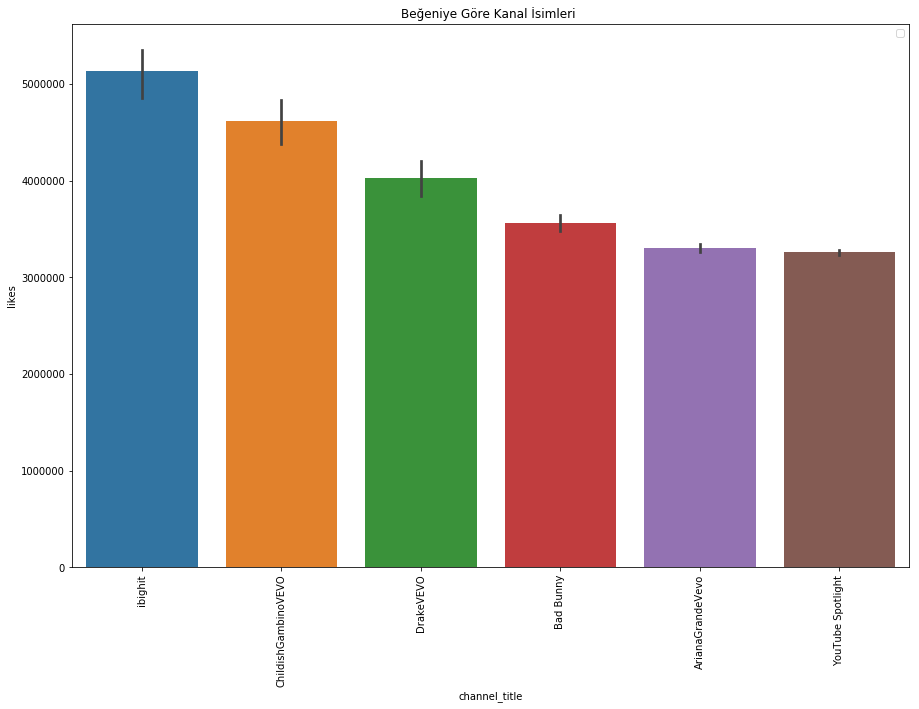

In [9]:
new_index = gb['likes'].sort_values(ascending = False).index.values
sorted_data = gb.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['likes'].head(100),data = sorted_data)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğeniye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


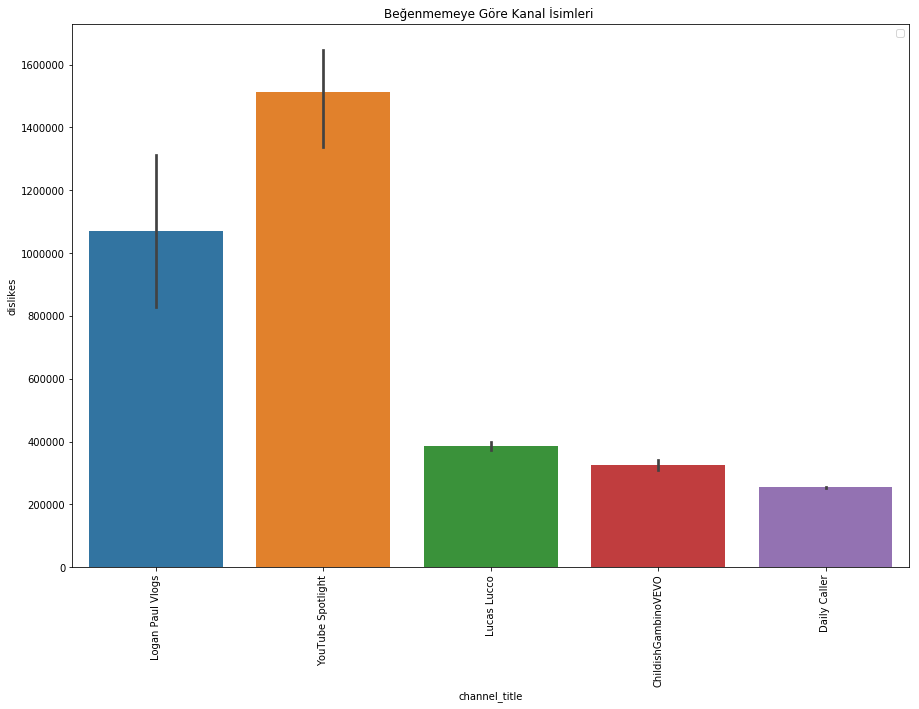

In [10]:
new_index = gb['dislikes'].sort_values(ascending = False).index.values
sorted_data = gb.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['dislikes'].head(100),data = gb)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğenmemeye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


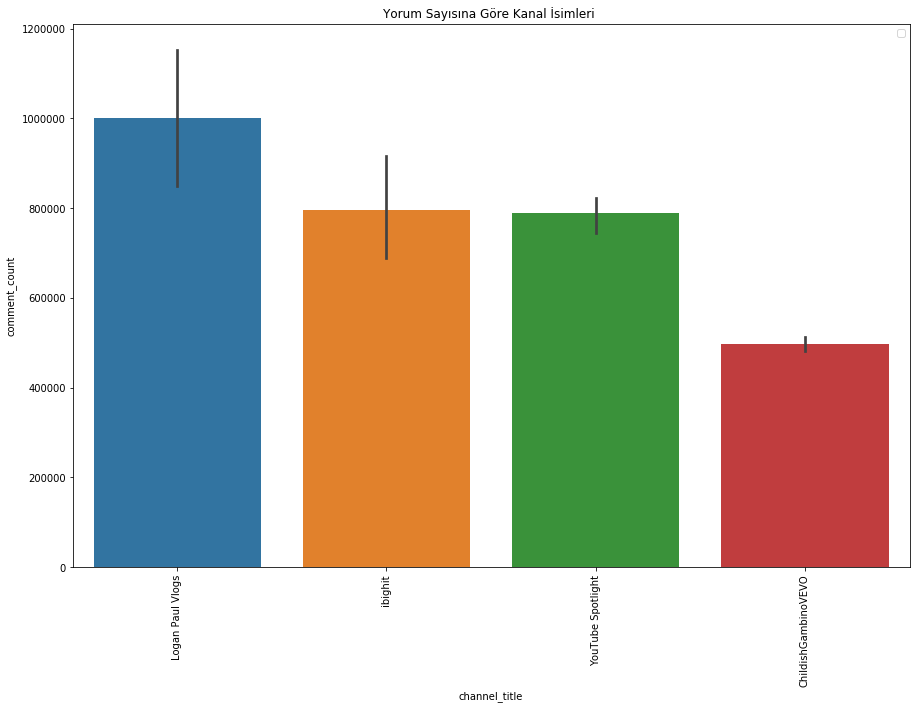

In [11]:
new_index = gb['comment_count'].sort_values(ascending = False).index.values
sorted_data = gb.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['comment_count'].head(100),data = gb)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Yorum Sayısına Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


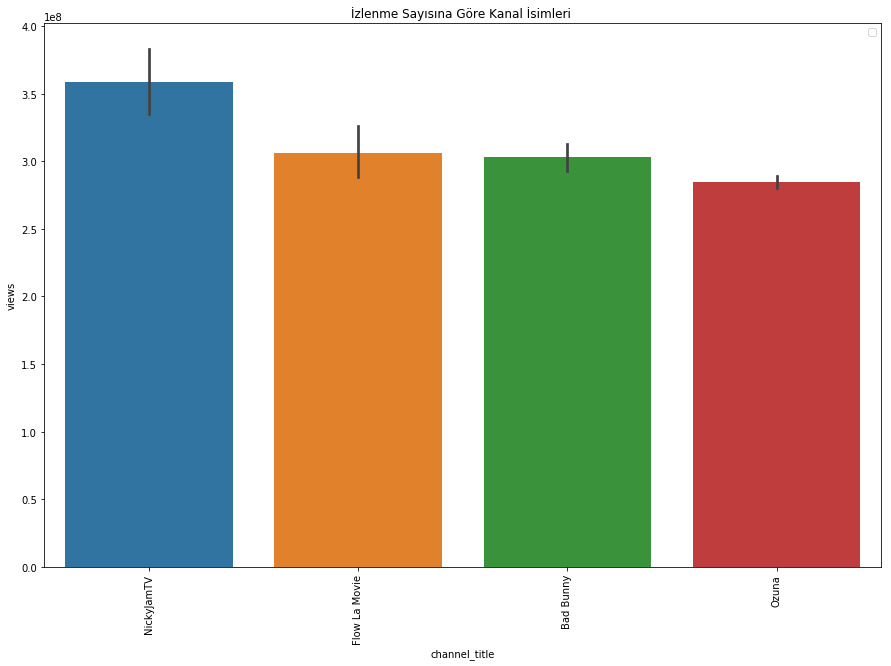

In [12]:
new_index = gb['views'].sort_values(ascending = False).index.values
sorted_data = gb.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(30) , y = sorted_data['views'].head(30),data = gb)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('İzlenme Sayısına Göre Kanal İsimleri ')
plt.show()